# Summer 2022 Python Tutorial

#### Import the packages we need.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(context='notebook', font_scale=1.6, style='whitegrid')
%matplotlib inline

#### Generate some fake data: a linear relationship with scatter.

Choose our "truth" values.

In [3]:
slope = 0.7 # slope
intercept = 1.3   # intercept
truecoeff = [slope, intercept] # note: the order is important
scatter = 0.5
npts = 100

Instantiate the data.

In [4]:
xval = np.random.uniform(0.0, 10.0, npts)    # random independent variable
yval = np.polyval(truecoeff, xval)               # evaluate the polynomial
yerr = np.random.normal(0.0, scatter, npts)  # amount of scatter per point
yval += yerr                                 # dependent variable (with scatter)

Make a scatterplot including the uncertainties.

In [5]:
def make_plot_v1(xdata, ydata, yunc):
    plt.errorbar(xdata, ydata, yunc, fmt='s', color='g', label='Data')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.legend(loc='upper left')

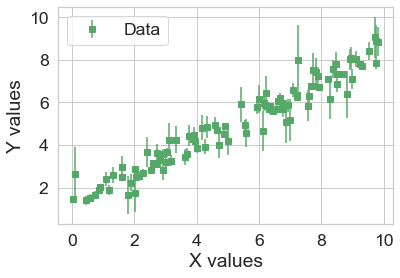

In [6]:
make_plot_v1(xval, yval, yerr)

#### Next, let's fit a linear model and update our plot.

In [7]:
def bestfit_line_v1(xdata, ydata, order=1):
    coeff = np.polyfit(xval, yval, order)
    return coeff

In [8]:
bestcoeff = bestfit_line_v1(xval, yval)
print('Input coefficients: slope={}, intercept={}'.format(truecoeff[0], truecoeff[1]))
print('Best-fitting coefficients: slope={:.4f}, intercept={:.4f}'.format(bestcoeff[0], bestcoeff[1]))

Input coefficients: slope=0.7, intercept=1.3
Best-fitting coefficients: slope=0.7097, intercept=1.2981


In [9]:
def make_plot_v2(xdata, ydata, yunc, coeff=None, coeff_err=None):
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.errorbar(xdata, ydata, yunc, fmt='s', color='g', label='Data')
    ax.set_xlabel('X values')
    ax.set_ylabel('Y values')
    if coeff is not None:
        if coeff_err is not None:
            label = r'$m={:.4f}\pm{:.4f}$, $b={:.4f}\pm{:.4f}$'.format(
                coeff[0], coeff_err[0], coeff[1], coeff_err[1])
        else:
            label = 'm={:.4f}, b={:.4f}'.format(coeff[0], coeff[1])
                
        ax.plot(xdata, np.polyval(bestcoeff, xdata), ls='-', lw=2,
                color='red', label=label)
    ax.legend(loc='upper left')    

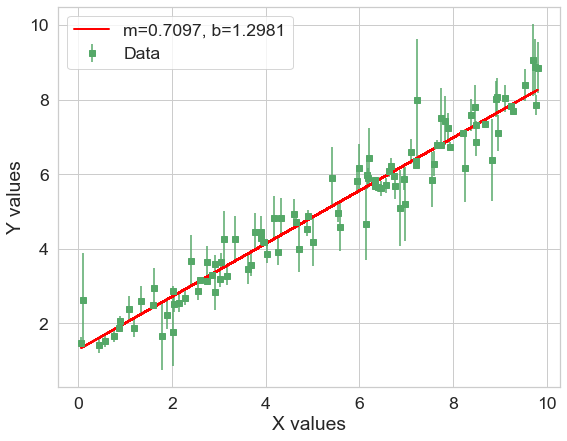

In [10]:
make_plot_v2(xval, yval, yerr, coeff=bestcoeff)

What about the uncertainties on the best-fitting parameters of the model (the slope and the intercept)? We just need to compute the covariance matrix!

In [11]:
def bestfit_line_v2(xdata, ydata, yuncertainty, order=1):
    coeff, cov = np.polyfit(xval, yval, order, w=1/yuncertainty, cov='unscaled')
    coeff_err = np.sqrt(np.diag(cov))
    return coeff, coeff_err

In [12]:
bestcoeff, bestcoeff_err = bestfit_line_v2(xval, yval, yerr, order=1)
print('Input coefficients: slope={}, intercept={}'.format(truecoeff[0], truecoeff[1]))
print('Best-fitting coefficients: slope={:.4f}+/-{:.4f}, intercept={:.4f}+/-{:.4f}'.format(
    bestcoeff[0], bestcoeff_err[0], bestcoeff[1], bestcoeff_err[1]))

Input coefficients: slope=0.7, intercept=1.3
Best-fitting coefficients: slope=0.7017+/-0.0023, intercept=1.2965+/-0.0067


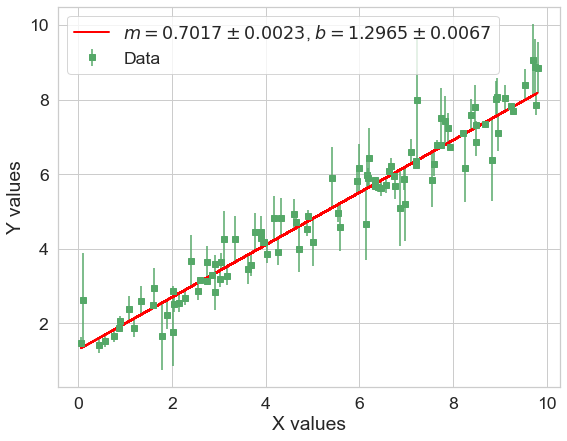

In [13]:
make_plot_v2(xval, yval, yerr, coeff=bestcoeff, coeff_err=bestcoeff_err)

#### Can we write and read a file with our data? Yes!

In [14]:
outfile = 'example-data.txt'
np.savetxt(outfile, np.vstack((xval, yval, yerr)).T)
!head 'example-data.txt'

2.746340130639416621e+00 3.646225884392759298e+00 4.237877929451678294e-01
9.804188180058178048e+00 8.851988815128146726e+00 6.890570890874215815e-01
3.112414543005546097e+00 4.251148666301687307e+00 7.724584861978052164e-01
2.014402147985567826e+00 1.777216689436407648e+00 -9.328648141534899851e-01
5.989536497369095436e+00 6.155811308734656428e+00 6.631357605762907559e-01
9.285261818702869263e+00 7.704727247117694411e+00 -9.495602597431296310e-02
6.141487684758483390e+00 4.653518626524321355e+00 -9.455227528066169063e-01
1.091252577623447184e+00 2.396802686028370211e+00 3.329258816919570263e-01
3.690889081359688184e+00 3.573375724464400882e+00 -3.102466324873809356e-01
7.236866881096676529e+00 7.995681808885060526e+00 1.629874992117387622e+00


Now let's read the contents of the file back in.

In [15]:
print('Reading {}'.format(outfile))
xdata, ydata, yunc = np.loadtxt(outfile, unpack=True)

Reading example-data.txt


#### Finally, let's put everything back together into a Class.

In [16]:
class ExampleClass(object):
    def __init__(self, slope=0.7, intercept=1.3, scatter=0.5, npts=100):
        self.truecoeff = [slope, intercept] # note: the order is important
        self.npts = npts
        self.scatter = scatter
        
    def make_data(self):
        xval = np.random.uniform(0.0, 10.0, self.npts)         # random independent variable
        yval = np.polyval(self.truecoeff, xval)                # evaluate the polynomial
        yerr = np.random.normal(0.0, self.scatter, self.npts)  # amount of scatter per point
        yval += yerr                                           # dependent variable (with scatter)
        return xval, yval, yerr
    
    def bestfit_line(self, xdata, ydata, yuncertainty, order=1):
        coeff, cov = np.polyfit(xval, yval, order, w=1/yuncertainty, cov='unscaled')
        coeff_err = np.sqrt(np.diag(cov))
        return coeff, coeff_err    
    
    def write_data(self, xdata, ydata, yuncertainty, outfile='example-data.txt'):
        np.savetxt(outfile, np.vstack((xdata, ydata, yuncertainty)).T)
        print('Writing {}'.format(outfile))
    
    def make_plot(self, xdata, ydata, yunc, coeff=None, coeff_err=None, pngfile=None):
        fig, ax = plt.subplots(figsize=(9, 7))
        ax.errorbar(xdata, ydata, yunc, fmt='s', color='g', label='Data')
        ax.set_xlabel('X values')
        ax.set_ylabel('Y values')
        if coeff is not None:
            if coeff_err is not None:
                label = r'$m={:.4f}\pm{:.4f}$, $b={:.4f}\pm{:.4f}$'.format(
                    coeff[0], coeff_err[0], coeff[1], coeff_err[1])
            else:
                label = 'm={:.4f}, b={:.4f}'.format(coeff[0], coeff[1])
                
            ax.plot(xdata, np.polyval(bestcoeff, xdata), ls='-', lw=2,
                    color='red', label=label)
        ax.legend(loc='upper left')        
        if pngfile:
            print('Writing {}'.format(pngfile))
            fig.savefig(pngfile)

In [17]:
Example = ExampleClass()

In [18]:
xval, yval, yerr = Example.make_data()

In [19]:
Example.write_data(xval, yval, yerr)

Writing example-data.txt


In [20]:
bestcoeff, bestcoeff_err = Example.bestfit_line(xval, yval, yerr, order=1)

Writing lineplot.png


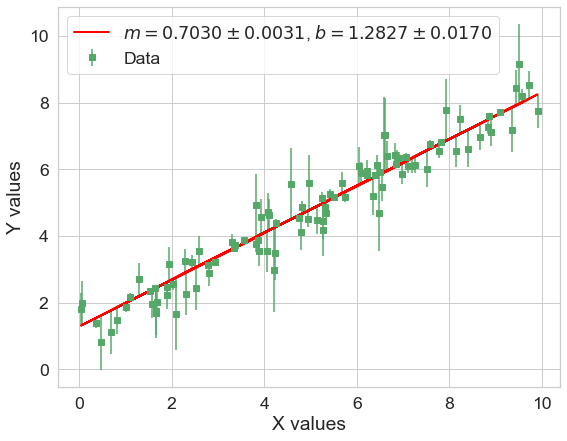

In [21]:
Example.make_plot(xval, yval, yerr, coeff=bestcoeff, coeff_err=bestcoeff_err, pngfile='lineplot.png')